In [1]:
import torch
from topnet import TopNet18
import time

net = TopNet18(in_planes=16)
net.to(device='cuda')

timings = []

for sz in [64, 128, 256, 512, 1024, 2048]:
    X = torch.randn(sz, 3, 64, 64, device='cuda')
    t0 = time.time()
    Y = net(X)
    g = (Y.sum()).backward()
    g = Y.detach().cpu().numpy()
    timings.append({
        'time': (time.time() - t0),
        'sz': sz,
        'model': 'topnet'
    })
    del X

del net

from torchvision import models
net = models.resnet18()
net.to(device='cuda')

for sz in [64, 128, 256, 512, 1024, 2048]:
    X = torch.randn(sz, 3, 64, 64, device='cuda')
    t0 = time.time()
    Y = net(X)
    g = (Y.sum()).backward()
    g = Y.detach().cpu().numpy()
    timings.append({
        'time': (time.time() - t0),
        'sz': sz,
        'model': 'resnet'
    })
    del X

/home/pmin/miniconda3/envs/py3/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [1]:
import torch
from topnet import TopNet18
import time

net = TopNet18(in_planes=16)
net

/home/pmin/miniconda3/envs/py3/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


TopNet(
  (conv1): Sequential(
    (0): DownsampleUnstack(stride=2)
    (1): TopoLayer(channels_in=12, channels_out=16, kernel_size=3, stride=1, h=32)
  )
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): TopoLayer(channels_in=16, channels_out=16, kernel_size=3, stride=1, h=16)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): TopoLayer(channels_in=16, channels_out=16, kernel_size=3, stride=1, h=16)
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): TopoLayer(channels_in=16, channels_out=16, kernel_size=3, stride=1, h=16)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_

In [4]:
net = TopNet18(in_planes=16)
net

TopNet(
  (conv1): Frontend(
    (topolayer): TopoLayer()
  )
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv3x3(
        (topolayer): TopoLayer()
      )
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv3x3(
        (topolayer): TopoLayer()
      )
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv3x3(
        (topolayer): TopoLayer()
      )
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv3x3(
        (topolayer): TopoLayer()
      )
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, a

<AxesSubplot:xlabel='sz', ylabel='time'>

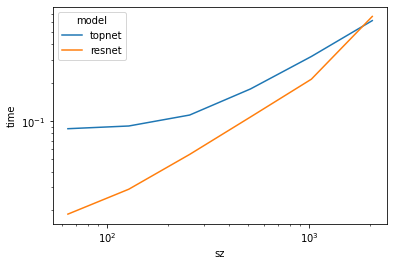

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(timings)

f = sns.lineplot(data=df, x="sz", y="time", hue="model")
f.set(xscale='log', yscale='log')

f